In [13]:
import sys
sys.path.append('..')
from common import *

In [14]:
def crop_img_black_parts_horizontaly(img):
    max_x = -1
    for x in range(len(img[0]) - 1, -1, -1):
        if max_x != -1:
            break
        for y in range(len(img)):
            if (img[y, x, :] != 0).any():
                max_x = x
                break
    
    return img[:, 0:max_x, :]

In [15]:
def merge_two_images(query_img, train_img):
    query_kp, query_des = get_image_sift_feature(query_img)
    train_kp, train_des = get_image_sift_feature(train_img)
    matches = get_matches(query_des, train_des, 0.8)
    pts_dst = np.array([(query_kp[m[0].queryIdx].pt[0], query_kp[m[0].queryIdx].pt[1]) for m in matches])
    pts_src = np.array([(train_kp[m[0].trainIdx].pt[0], train_kp[m[0].trainIdx].pt[1]) for m in matches])
    h = compute_homography_ransac(pts_dst, pts_src)
    target_img = wrap_prespective(train_img, h, (query_img.shape[1] + train_img.shape[1], query_img.shape[0]))
    for y in range(len(query_img)):
        for x in range(len(query_img[0])):
            if (target_img[y, x, :] == [0, 0, 0]).all():
                target_img[y, x, :] = query_img[y, x, :]
                
    target_img = crop_img_black_parts_horizontaly(target_img)
    return target_img

## 2.3 Create the output mosaic

### Example 1 (Two images)

In [16]:
train_img = cv2.imread('img\image1.jpg')
query_img = cv2.imread('img\image2.jpg')

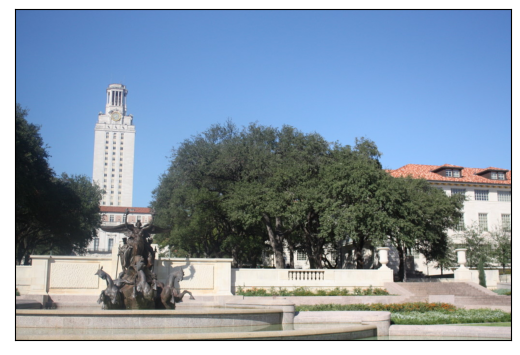

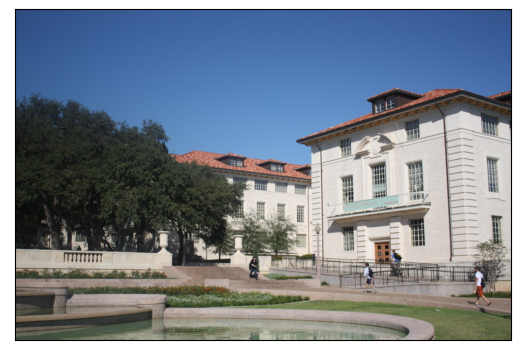

In [17]:
show_image(query_img)
show_image(train_img)

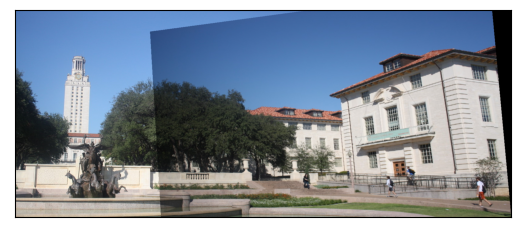

In [18]:
merged_img = merge_two_images(query_img, train_img)
show_image(merged_img)